# Week 3
## Lecture

### Classification
#### Only two choices: TRUE or FALSE
- Spam or non-spam emails
- Sold or not sold
- Credit card: Fraud or Real transactions

#### Or more than two options:
- Hand-written digits: image of digit and output is the digit selected (0-9)
- Automatically grading system: grade -> F/P/C/D/HD
- Traffic sign recognition

### Logistic Regression
- Logistic regression is a way of using some regression algorithms for classification
- Logistic regression outputs **probability margins**, between 0 and 1, for estimating membership to a particular class.
- The number gets transformed via a function, such $0 < \sigma(\theta^T.x) < 1$
- Then, classification is thus based on this probability
- And $\sigma(t) = \frac{1}{1+e^{-t}}$ and $t = \theta^T.x$

### Personal note:
- $\hat{y} = \theta^T.x$ in linear regression. Then adding $\sigma$ to the formula to change all the predicted y into probability $\hat{p}$ with $\hat{p} = \sigma(\theta^T.x)$

### Prediction
- Predict whether an instance $x$ belongs to a particular class by setting probability thresholds (usually 0.5)
- $$\hat{p} < 0.5 \Longrightarrow \hat{y} = 0$$ or $$\hat{p} \geqslant 0.5 \Longrightarrow \hat{y} = 1$$

### Cost function for a single training instance
- Measure how far the predicted probability $\hat{p}$ is, from the **actual class label $(y)$** using the following formula $$y = 1 \Longrightarrow c(\theta) = -\log(\hat{p})$$ or $$y = 0 \Longrightarrow c(\theta) = -\log(1 - \hat{p})$$

### Log loss function
- The cost function over the whole training set is the average cost over all training instances, which can be written in log loss function
- $$J(\theta) = -\frac{1}{m} \Sigma^{m}_{i=1} [y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})]$$
- Need to find $\theta$ to make $J(\theta)$ smallest
- But how to find? No formula, we need to try all combination until it's found
- But we can utilise the gradient descent for this situation

#### Use gradient descend
- The partial derivative with respect to a parameter $\theta_j$ $$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \Sigma^{m}_{i=1}[\sigma(\theta^T.x) - y^{(i)}]{x_j}^{(i)}$$
- For each instance it computes the prediction error, multiplies it by the jth feature value, then computes the average over all training instances.
- Once having the gradient vector containing all the partial derivative, we can use it in the batch GD algorithm.
- Stochastic and mini-batch is also considered.
- Compare them with the linear regression.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn import datasets

# Load data
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [8]:
print(iris['feature_names'])
print(iris['target'])
print(iris['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [9]:
# Data have 4 column
# Based on information from iris['feature_names'], we know petal width is 4th column
# Extract that one
p_width = iris["data"][:, 3:]

# We know in the target, 2 is Virginica (based on target_names)
virginica = (iris['target'] == 2) # change into T/F value. Virginica = TRUE
virginica = virginica.astype(np.int32)
# .astype(np.int32) change T/F value into numeric value (0/1)

In [10]:
p_width
# Shape: (150, 1)

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [11]:
virginica
# Shape: (150, )

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
# TRAINING
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(p_width, virginica)

LogisticRegression()

In [13]:
X_new = np.linspace(0, 3, 1000) # Create 1000 values, with the same interval from 0 to 3
X_new = X_new.reshape(-1,1) # Change structure: -1 (as many rows as it can), 1 (column)

y_probability = log_reg.predict_proba(X_new) 

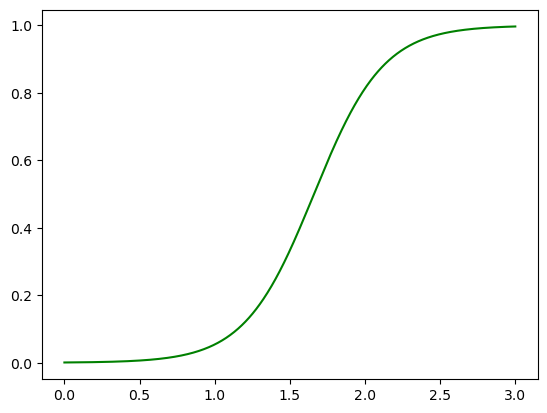

In [14]:
plt.plot(X_new, y_probability[:, 1], "g-", label = "Iris-Virginica")

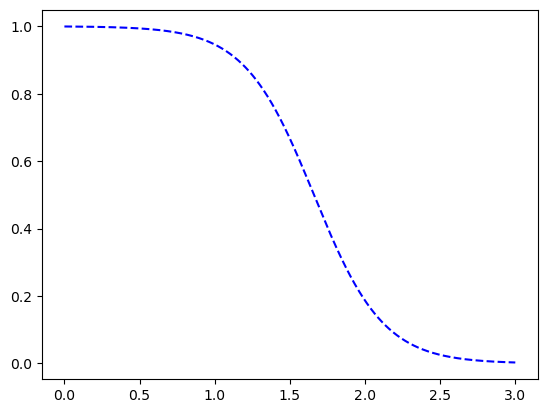

In [15]:
plt.plot(X_new, y_probability[:, 0], "b--", label = "Not Iris-Virginica")

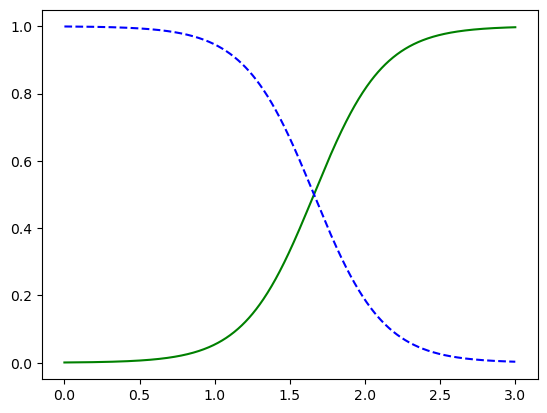

In [16]:
plt.plot(X_new, y_probability[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_probability[:, 0], "b--", label = "Not Iris-Virginica")

- From 0.0 to around 1.6, the percentage of not being Virginica is higher
- From around 1.6 to 3.0, the percentage of being Virginica is higher
- 1.6 is likely a threshold (50%, divider, decision boudary)
- Hence, if the petal width is greater than 1.6, it will be predicted as Iris Virginica. Otherwise, it won't

### Confusion Matrix
- It count the number of times instances of class A are classified as class B, for all A/B pairs
- First need to have a set of prediction so that they can be compared to the actual targets
- Each row in a confusion matrix represent an actual class
- Each column represents a predicted class
- A perfect classifier would only have true positives and true negatives
- Its confusion matrix would have nonzero value only on its main diagnoal (top left to bottom right)
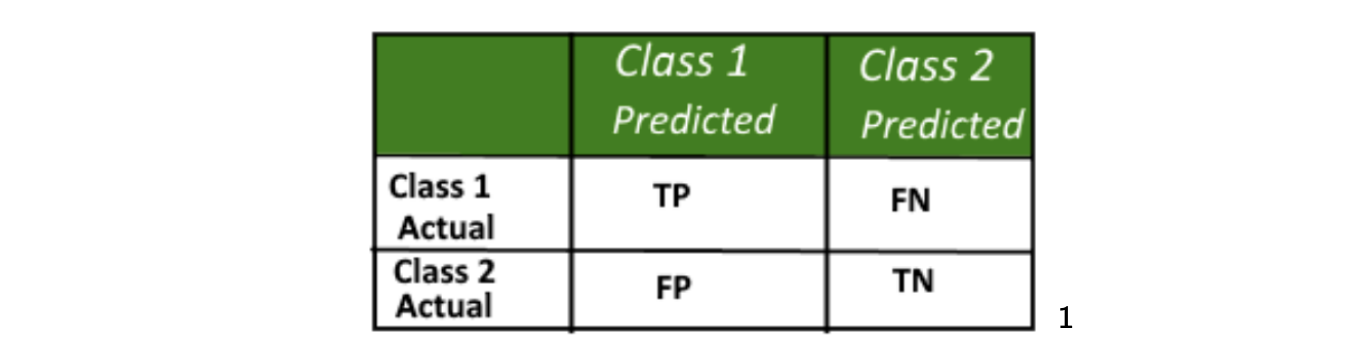

In [19]:
### Computing confusion matrix

# After have model, use that model to see check the original data
# To validate whether the model is good or not
virginica_predict = log_reg.predict(p_width)

In [56]:
virginica_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [60]:
log_reg.predict([[1.77], [0.4]])

array([1, 0], dtype=int32)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(virginica, virginica_predict)
# Remind: virginica is actual data

array([[98,  2],
       [ 4, 46]])

Result means 
- 98 values predicted as 0 are actually 0 (Correct)
- 4 values predicted as 0 are actually 1
- 2 values predicts as 1 are actuaully 0
- 46 value predicted as 1 are actually 1 (Correct)

- precision of classifier $= \frac{TP}{TP + FP}$, $TP + FP$ is total predicted positives
- recall (also called sensitivity or the true positive rate (TPR)) $= \frac{TP}{TP + FN}$, $TP + FN$ is total actual positives

In [24]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(virginica, virginica_predict))
print(recall_score(virginica, virginica_predict))

0.9583333333333334
0.92


## Multiclass Classification
- Google email classification: Primary, Social, Promotions, Forums, Spam, ...
- Student grades classification: F, P, C, D, HD
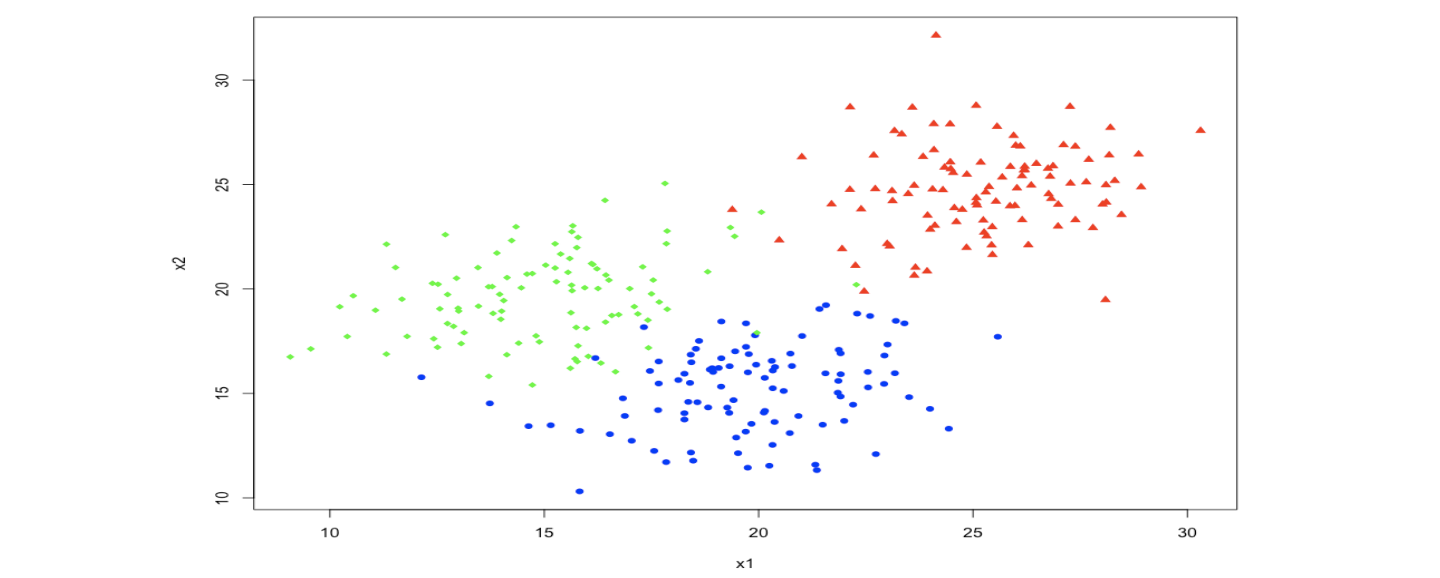
- Using binomial logistic regression
- Train a logistic regression classifier $f^{(i)}(x)$ for each class $i$ to predict the probability that $y = i$
- Use the classifier for prediction, for a new input $x$, select the class $max_{i}f^{(i)}(x)$
- Perform a prediction with each classifier

## Softmax Regression
- It generalised **logistic regression** to multiclass without having to train and combine multiple logistic classifiers
- For a given number of classes $k$
- Given an instance $x$, softmax regression first computes a score via sorce function $s_k(x)$
- $s_k(x) = (\theta^{(k)})^T.x$ with $\theta^{(k)}$ is unique parameter vector for each class $k$. **This one outputs a score**

### To convert it to probability via softmax function
- $$\hat{p}_k = \sigma(s(x))_k = \frac{e^{(s_k(x))}}{\Sigma^{k}_{j=1}(e^{(s_j(x))})}$$

In [27]:
X = iris["data"][:, (2,3)] # Choose 3rd (petal length )and 4th column (petal width)
y = iris["target"] # All information of target, without converting into T/F

In [28]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y )

LogisticRegression(C=10, multi_class='multinomial')

In [29]:
softmax_reg.predict_proba([[5, 2], [2,1]])
# Result is the matching probability of that flower for each type

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01],
       [9.49034617e-01, 5.09653797e-02, 3.17386546e-09]])

In [30]:
softmax_reg.predict([[5, 2], [2,1], [3,1]])
# Result is the column it belong to, based on the maximum of above result

array([2, 0, 1])

In [31]:
test = softmax_reg.predict(X)

In [32]:
test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
confusion_matrix(test, y)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

## TUTORIAL
### Question 2
1) Build a classifier to detect the Iris setosa type based only on the petal width feature.
2) From the plot, what is the range of petal width for Iris setosa?
3) Use the classifier to predict if the flowers are of the setosa type if their petal widths
are 0.3, 0.75, and 1.5 cm respectively.
4) Change the above predictions to probabilities.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn import datasets
iris = datasets.load_iris()  

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [15]:
X = iris['data'][:,3:]
y = (iris['target'] == 0).astype(int)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)  

LogisticRegression()

In [33]:
print(min(X), max(X))

[0.1] [2.5]


In [35]:
X_new = np.linspace(0, 2.5, 200).reshape(-1, 1)

In [37]:
y_proba = log_reg.predict_proba(X_new)
print(y_proba)

[[3.15754500e-02 9.68424550e-01]
 [3.33647745e-02 9.66635225e-01]
 [3.52518059e-02 9.64748194e-01]
 [3.72414514e-02 9.62758549e-01]
 [3.93388154e-02 9.60661185e-01]
 [4.15492011e-02 9.58450799e-01]
 [4.38781121e-02 9.56121888e-01]
 [4.63312527e-02 9.53668747e-01]
 [4.89145271e-02 9.51085473e-01]
 [5.16340378e-02 9.48365962e-01]
 [5.44960823e-02 9.45503918e-01]
 [5.75071485e-02 9.42492852e-01]
 [6.06739086e-02 9.39326091e-01]
 [6.40032114e-02 9.35996789e-01]
 [6.75020716e-02 9.32497928e-01]
 [7.11776587e-02 9.28822341e-01]
 [7.50372816e-02 9.24962718e-01]
 [7.90883727e-02 9.20911627e-01]
 [8.33384673e-02 9.16661533e-01]
 [8.77951820e-02 9.12204818e-01]
 [9.24661883e-02 9.07533812e-01]
 [9.73591845e-02 9.02640816e-01]
 [1.02481863e-01 8.97518137e-01]
 [1.07841876e-01 8.92158124e-01]
 [1.13446793e-01 8.86553207e-01]
 [1.19304062e-01 8.80695938e-01]
 [1.25420960e-01 8.74579040e-01]
 [1.31804544e-01 8.68195456e-01]
 [1.38461597e-01 8.61538403e-01]
 [1.45398568e-01 8.54601432e-01]
 [1.526215

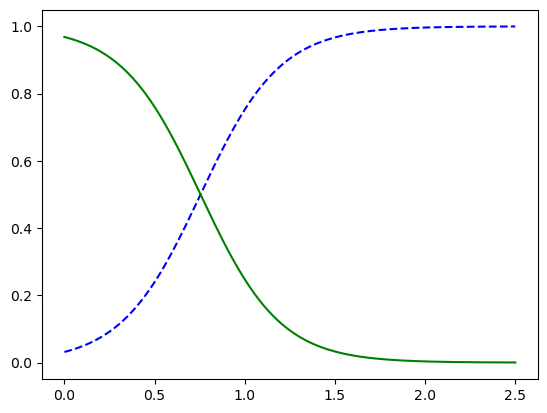

In [41]:
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Setosa")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Setosa")

In [43]:
log_reg.predict([[0.3],[0.75],[1.5]])

array([1, 1, 0])

In [45]:
log_reg.predict_proba([[0.3],[0.75],[1.5]])

array([[0.11276102, 0.88723898],
       [0.49445696, 0.50554304],
       [0.96703998, 0.03296002]])

### Question 3: The files students1.csv and students2.csv, available on vUWS, contain examples about subject results, pass(1) / fail(0), versus average study time per week.
1) Use scikit-learn to compute a logistic regression model from students1.csv for the classification.
2) Use the model to classify the (training) instances in students1.csv. How many of the examples are misclassified? What are the precision and recall values?
3) Use the model to classify the instances in students2.csv. How many of the instances are misclassfied in this case? What are the precision and recall values?

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
student1 = pd.read_csv('students1.csv', header = None)
student2 = pd.read_csv('students2.csv', header = None)

In [75]:
student1 = student1.to_numpy()
student2 = student2.to_numpy()

In [83]:
X = student1[:,0].reshape(-1,1)
y = student1[:,1].reshape(-1,1)

In [85]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [123]:
student1_predict = log_reg.predict(X)

In [125]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, student1_predict)

array([[49,  1],
       [ 1, 49]])

In [127]:
student2_predict = log_reg.predict(student2[:,0].reshape(-1,1))

In [129]:
confusion_matrix(student2[:,1], student2_predict)

array([[49,  1],
       [ 0, 50]])